In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

from scipy.stats import randint
from random import randint
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, recall_score, average_precision_score, roc_auc_score, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

# Data Anaylsis

In [2]:
df = pd.read_csv('MCI_2014_to_2019.csv')

In [6]:
df.head()
df.tail()
df.shape

,MCI,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,Assault,-79.589356,43.758465,6371,GO-20151776190,2000-01-01T10:53:00.000Z,2015-10-15T10:53:00.000Z,Apartment,1430,100,...,1,1,Saturday,10,D23,2,Mount Olive-Silverstone-Jamestown (2),-79.589356,43.758465,6681
1,Assault,-79.532608,43.720001,16152,GO-20143243077,2000-01-01T00:00:00.000Z,2014-10-06T08:28:00.000Z,House,1430,100,...,1,1,Saturday,0,D31,23,Pelmo Park-Humberlea (23),-79.532608,43.720001,16727
2,Theft Over,-79.343628,43.707478,18847,GO-20141722881,2000-11-22T08:00:00.000Z,2014-03-18T12:35:00.000Z,Commercial,2130,210,...,22,327,Wednesday,8,D53,55,Thorncliffe Park (55),-79.343628,43.707478,18289
3,Assault,-79.220909,43.826324,19403,GO-20142047470,2000-01-01T00:00:00.000Z,2014-05-09T20:26:00.000Z,House,1430,100,...,1,1,Saturday,0,D42,131,Rouge (131),-79.220909,43.826324,19133
4,Theft Over,-79.393845,43.675167,24002,GO-20142771849,2000-08-01T12:00:00.000Z,2014-08-25T10:06:00.000Z,Other,2130,210,...,1,214,Tuesday,12,D53,95,Annex (95),-79.393845,43.675167,24211


,MCI,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
206430,Assault,-79.450066,43.665993,185985,GO-2018312478,1990-02-01T00:00:00.000Z,2018-02-18T17:35:00.000Z,Apartment,1430,100,...,1,32,Thursday,0,D11,93,Dovercourt-Wallace Emerson-Junction (93),-79.450066,43.665993,185823
206431,Assault,-79.300545,43.688450,186080,GO-201949831,1996-01-01T07:29:00.000Z,2019-01-09T07:29:00.000Z,Apartment,1430,100,...,1,1,Monday,7,D54,62,East End-Danforth (62),-79.300545,43.688450,186980
206432,Break and Enter,-79.331467,43.771206,189050,GO-20181010560,1997-12-19T16:00:00.000Z,2018-06-04T12:54:00.000Z,Commercial,2120,200,...,19,353,Friday,16,D33,53,Henry Farm (53),-79.331467,43.771206,189293
206433,Assault,-79.564217,43.676842,195930,GO-2019461576,1999-01-01T00:00:00.000Z,2019-03-13T20:25:00.000Z,Apartment,1420,100,...,1,1,Friday,0,D23,7,Willowridge-Martingrove-Richview (7),-79.564217,43.676842,195791
206434,Assault,-79.564217,43.676842,195931,GO-2019461576,1999-01-01T00:00:00.000Z,2019-03-13T20:25:00.000Z,Apartment,1430,100,...,1,1,Friday,0,D23,7,Willowridge-Martingrove-Richview (7),-79.564217,43.676842,195863


(206435, 29)

In [7]:
df.describe()
df.info()
list(df)

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,ObjectId
count,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000
mean,-79.394940,43.707379,103218.000000,1696.667755,145.973953,2016.619323,15.746855,187.139933,12.838617,2016.571487,15.507976,186.470734,12.549868,72.230223,-79.394940,43.707379,103218.000000
std,0.104386,0.052718,59592.795747,323.481988,51.739660,1.717764,8.770511,103.601412,6.583508,1.829090,8.905871,103.906255,7.220263,40.758939,0.104386,0.052718,59592.795747
min,-79.639267,43.587093,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,1966.000000,1.000000,1.000000,0.000000,1.000000,-79.639267,43.587093,1.000000
25%,-79.471481,43.661152,51609.500000,1430.000000,100.000000,2015.000000,8.000000,100.000000,8.000000,2015.000000,8.000000,99.000000,7.000000,36.000000,-79.471481,43.661152,51609.500000
50%,-79.393333,43.701328,103218.000000,1450.000000,100.000000,2017.000000,16.000000,189.000000,14.000000,2017.000000,16.000000,188.000000,14.000000,76.000000,-79.393333,43.701328,103218.000000
75%,-79.319374,43.752068,154826.500000,2120.000000,200.000000,2018.000000,23.000000,277.000000,18.000000,2018.000000,23.000000,276.000000,19.000000,108.000000,-79.319374,43.752068,154826.500000
max,-79.123100,43.850788,206435.000000,2135.000000,230.000000,2019.000000,31.000000,366.000000,23.000000,2019.000000,31.000000,366.000000,23.000000,140.000000,-79.123100,43.850788,206435.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206435 entries, 0 to 206434
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MCI                  206435 non-null  object 
 1   X                    206435 non-null  float64
 2   Y                    206435 non-null  float64
 3   Index_               206435 non-null  int64  
 4   event_unique_id      206435 non-null  object 
 5   occurrencedate       206435 non-null  object 
 6   reporteddate         206435 non-null  object 
 7   premisetype          206435 non-null  object 
 8   ucr_code             206435 non-null  int64  
 9   ucr_ext              206435 non-null  int64  
 10  offence              206435 non-null  object 
 11  reportedyear         206435 non-null  int64  
 12  reportedmonth        206435 non-null  object 
 13  reportedday          206435 non-null  int64  
 14  reporteddayofyear    206435 non-null  int64  
 15  reporteddayofweek

['MCI',
 'X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Long',
 'Lat',
 'ObjectId']

In [8]:
# the data has very few missing values --> only in occurenceyear/occurencemonth/occurenceday/
# occurencedayofyear/occurrenceydayofweek --> fixed these using occurencedate

In [9]:
#pandas_profiling.ProfileReport(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e338d90>,
      dtype=object)

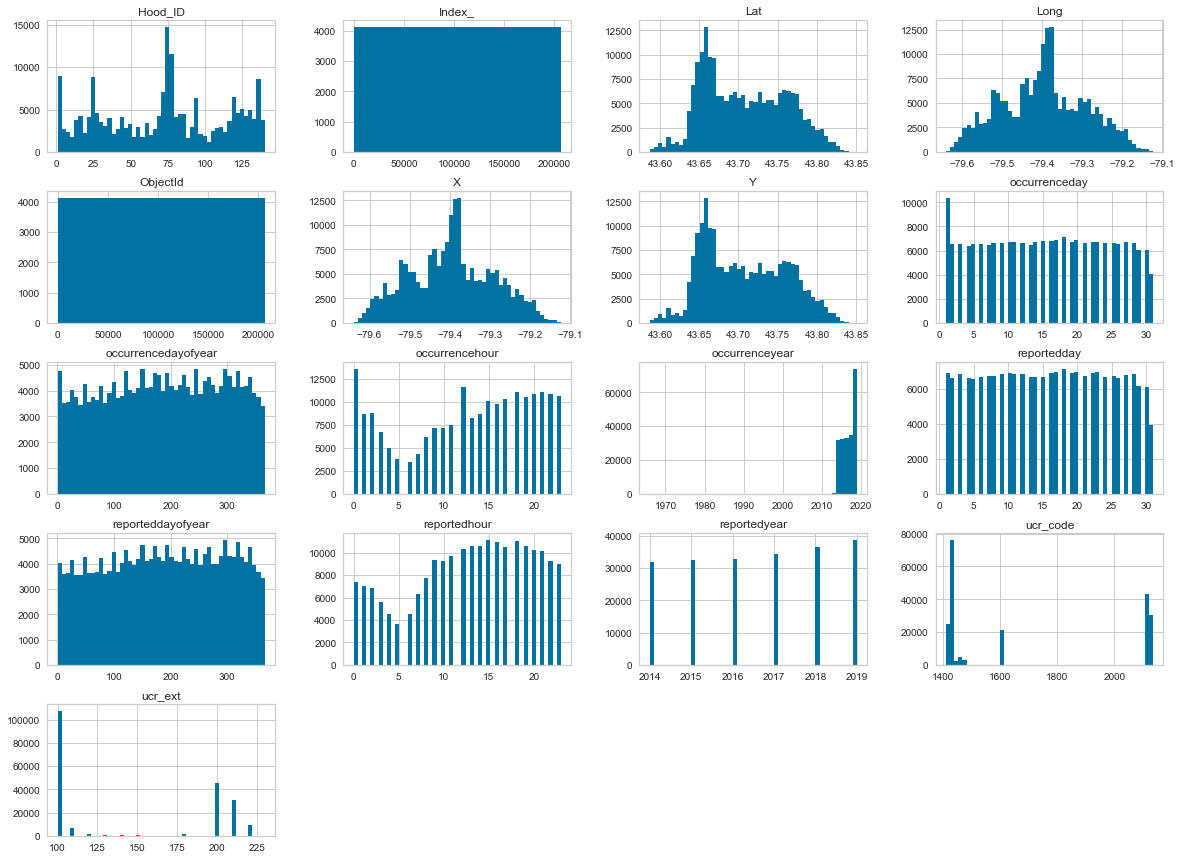

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

<Figure size 1080x720 with 0 Axes>

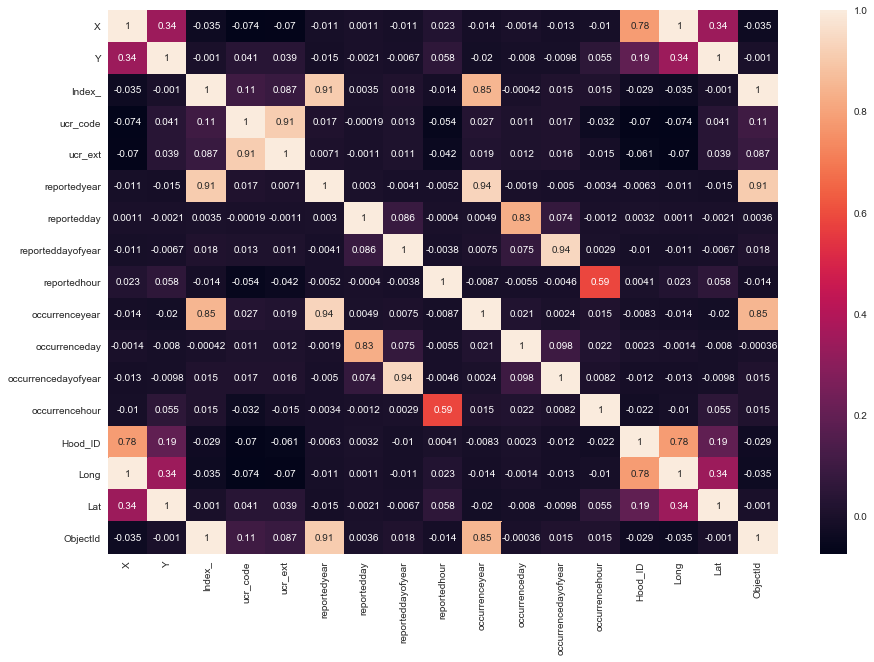

In [11]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

# Fill in Empty Cells

I did part of this in excel since we the information was all in occurencedate --> we just had to copy the data over from there into occurenceyear, occurencemonth
ALso had to convert some dates over to day of year, and the date into name of day of week ('e.g. Monday')

In [12]:
# have a bunch of highly correlated values
# Dropping X because it's the same as latitude
# Dropping Y because it's the same as longitude
# Dropping ObjectID because it only indicates what row the crime is in the excel sheet -->not important
# Dropping Index_ because it only indicates what row the crime is in the excel sheet -->not important
# Dropping event_unique_id because it tells us nothing important about crime and is categorical
# Dropping ucr_code and ucr_ext since they are just the code versions of the offence
# Dropping Hood_ID since it's a redundancy of Neighborhood

In [13]:
# https://www.publicsafety.gc.ca/cnt/rsrcs/pblctns/2015-r018/2015-r018-en.pdf
# this is the link we can use if we want to go more granular and use the UCR CODES to identify crimes in detail

In [14]:
list(df)

['MCI',
 'X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Long',
 'Lat',
 'ObjectId']

# Preprocessing

In [15]:
df = df[df['occurrenceyear'] > 2013]
df.head()
df.shape
# looks like we eliminated about 1114 entries by factoring in only data > 2013 occurenceyear

,MCI,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
1055,Robbery,-79.503388,43.769791,1,GO-20141289469,2014-01-06T01:08:00.000Z,2014-01-06T01:57:00.000Z,Other,1610,200,...,6,6,Monday,1,D31,27,York University Heights (27),-79.503388,43.769791,101
1056,Break and Enter,-79.291267,43.746101,2,GO-20141327980,2014-01-12T00:36:00.000Z,2014-01-12T04:19:00.000Z,Commercial,2120,200,...,12,12,Sunday,0,D41,119,Wexford/Maryvale (119),-79.291267,43.746101,102
1057,Break and Enter,-79.559212,43.697083,3,GO-20141329213,2014-01-12T11:22:00.000Z,2014-01-12T11:22:00.000Z,House,2120,220,...,12,12,Sunday,11,D23,6,Kingsview Village-The Westway (6),-79.559212,43.697083,103
1058,Robbery,-79.300468,43.808918,4,GO-20141331950,2014-01-12T20:58:00.000Z,2014-01-12T20:58:00.000Z,Other,1610,100,...,12,12,Sunday,20,D42,130,Milliken (130),-79.300468,43.808918,104
1059,Robbery,-79.300468,43.808918,5,GO-20141331950,2014-01-12T20:58:00.000Z,2014-01-12T20:58:00.000Z,Other,1610,100,...,12,12,Sunday,20,D42,130,Milliken (130),-79.300468,43.808918,105


(205321, 29)

In [16]:
col_list = ['MCI','premisetype','occurrenceyear','occurrencedayofyear','occurrencemonth',
            'occurrencedayofweek','occurrencehour','Division','Neighbourhood','Long','Lat']

In [17]:
df1 = df[col_list]
df1.head()

,MCI,premisetype,occurrenceyear,occurrencedayofyear,occurrencemonth,occurrencedayofweek,occurrencehour,Division,Neighbourhood,Long,Lat
1055,Robbery,Other,2014,6,January,Monday,1,D31,York University Heights (27),-79.503388,43.769791
1056,Break and Enter,Commercial,2014,12,January,Sunday,0,D41,Wexford/Maryvale (119),-79.291267,43.746101
1057,Break and Enter,House,2014,12,January,Sunday,11,D23,Kingsview Village-The Westway (6),-79.559212,43.697083
1058,Robbery,Other,2014,12,January,Sunday,20,D42,Milliken (130),-79.300468,43.808918
1059,Robbery,Other,2014,12,January,Sunday,20,D42,Milliken (130),-79.300468,43.808918


In [18]:
#There's some whitespace that needs to be stripped out of dataframe1 --> if we don't, one hot coding doubles up features
df1['occurrencedayofweek'] = df1['occurrencedayofweek'].str.strip()

<Figure size 1080x720 with 0 Axes>

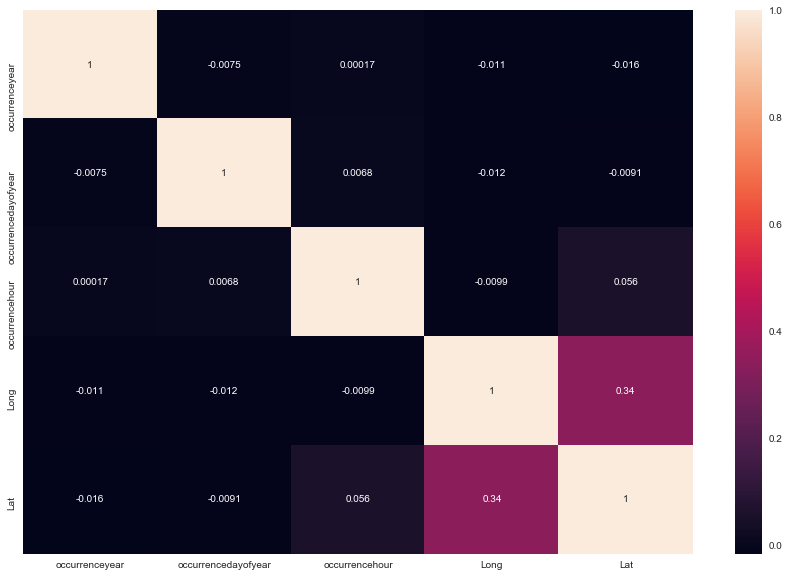

In [19]:
#resulting correlation map after getting rid of most features
corr = df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [20]:
list(df1)

['MCI',
 'premisetype',
 'occurrenceyear',
 'occurrencedayofyear',
 'occurrencemonth',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Neighbourhood',
 'Long',
 'Lat']

# Factorize Variables --> I think One Hote Encoding Might Be Fine

crime_var = pd.factorize(df1['MCI'])
df1['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1] 

premise_var = pd.factorize(df1['premisetype'])
df1['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 

year_var = pd.factorize(df1['occurrenceyear'])
df1['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

day_var = pd.factorize(df1['occurrencedayofyear'])
df1['occurrencedayofyear'] = day_var[0]
definition_list_day = day_var[1] 

month_var = pd.factorize(df1['occurrencemonth'])
df1['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

dayweek_var = pd.factorize(df1['occurrencedayofweek'])
df1['occurrencedayofweek'] = dayweek_var[0]
definition_list_dayweek = dayweek_var[1] 

hour_var = pd.factorize(df1['occurrencehour'])
df1['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

division_var = pd.factorize(df1['Division'])
df1['Division'] = division_var[0]
definition_list_division = division_var[1] 

neighbourhood_var = pd.factorize(df1['Neighbourhood'])
df1['Neighbourhood'] = neighbourhood_var[0]
definition_list_neighbourhood = neighbourhood_var[1] 

df1.head()
df1.tail()

max(df1['MCI'])

# Need to do More Feature Engineering

In [ ]:
# Incorporate some more features somehow

# Split Dataframe into X and Y

In [21]:
X = df1.drop(['MCI'], axis=1)
y = df1['MCI']
X.head()
y.head()
X.shape
y.shape

,premisetype,occurrenceyear,occurrencedayofyear,occurrencemonth,occurrencedayofweek,occurrencehour,Division,Neighbourhood,Long,Lat
1055,Other,2014,6,January,Monday,1,D31,York University Heights (27),-79.503388,43.769791
1056,Commercial,2014,12,January,Sunday,0,D41,Wexford/Maryvale (119),-79.291267,43.746101
1057,House,2014,12,January,Sunday,11,D23,Kingsview Village-The Westway (6),-79.559212,43.697083
1058,Other,2014,12,January,Sunday,20,D42,Milliken (130),-79.300468,43.808918
1059,Other,2014,12,January,Sunday,20,D42,Milliken (130),-79.300468,43.808918


1055            Robbery
1056    Break and Enter
1057    Break and Enter
1058            Robbery
1059            Robbery
Name: MCI, dtype: object

(205321, 10)

(205321,)

# One Hot Encode Remaining Features - Instead of Factorizing

In [22]:
#changing non-binary categories into binary
# Delete the redundant feature --> Eric
X = pd.get_dummies(X)
X.shape
X.head()
y.shape

(205321, 186)

,occurrenceyear,occurrencedayofyear,occurrencehour,Long,Lat,premisetype_Apartment,premisetype_Commercial,premisetype_House,premisetype_Other,premisetype_Outside,...,Neighbourhood_Willowdale West (37),Neighbourhood_Willowridge-Martingrove-Richview (7),Neighbourhood_Woburn (137),Neighbourhood_Woodbine Corridor (64),Neighbourhood_Woodbine-Lumsden (60),Neighbourhood_Wychwood (94),Neighbourhood_Yonge-Eglinton (100),Neighbourhood_Yonge-St.Clair (97),Neighbourhood_York University Heights (27),Neighbourhood_Yorkdale-Glen Park (31)
1055,2014,6,1,-79.503388,43.769791,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1056,2014,12,0,-79.291267,43.746101,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,2014,12,11,-79.559212,43.697083,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,2014,12,20,-79.300468,43.808918,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1059,2014,12,20,-79.300468,43.808918,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(205321,)

In [23]:
# Checking here for any whitespaces or incorrect features after one hot encoding
list(X)
X.shape

['occurrenceyear',
 'occurrencedayofyear',
 'occurrencehour',
 'Long',
 'Lat',
 'premisetype_Apartment',
 'premisetype_Commercial',
 'premisetype_House',
 'premisetype_Other',
 'premisetype_Outside',
 'occurrencemonth_April',
 'occurrencemonth_August',
 'occurrencemonth_December',
 'occurrencemonth_February',
 'occurrencemonth_January',
 'occurrencemonth_July',
 'occurrencemonth_June',
 'occurrencemonth_March',
 'occurrencemonth_May',
 'occurrencemonth_November',
 'occurrencemonth_October',
 'occurrencemonth_September',
 'occurrencedayofweek_Friday',
 'occurrencedayofweek_Monday',
 'occurrencedayofweek_Saturday',
 'occurrencedayofweek_Sunday',
 'occurrencedayofweek_Thursday',
 'occurrencedayofweek_Tuesday',
 'occurrencedayofweek_Wednesday',
 'Division_D11',
 'Division_D12',
 'Division_D13',
 'Division_D14',
 'Division_D22',
 'Division_D23',
 'Division_D31',
 'Division_D32',
 'Division_D33',
 'Division_D41',
 'Division_D42',
 'Division_D43',
 'Division_D51',
 'Division_D52',
 'Division_

(205321, 186)

# Split Into Training & Testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

In [26]:
X_train.head()
y_train.head()
X_test.head()
y_test.head()
X_train.shape
y_train.shape
X_test.shape
y_test.shape

,occurrenceyear,occurrencedayofyear,occurrencehour,Long,Lat,premisetype_Apartment,premisetype_Commercial,premisetype_House,premisetype_Other,premisetype_Outside,...,Neighbourhood_Willowdale West (37),Neighbourhood_Willowridge-Martingrove-Richview (7),Neighbourhood_Woburn (137),Neighbourhood_Woodbine Corridor (64),Neighbourhood_Woodbine-Lumsden (60),Neighbourhood_Wychwood (94),Neighbourhood_Yonge-Eglinton (100),Neighbourhood_Yonge-St.Clair (97),Neighbourhood_York University Heights (27),Neighbourhood_Yorkdale-Glen Park (31)
183613,2019,48,17,-79.379372,43.661877,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101231,2017,246,21,-79.589424,43.732025,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
177144,2019,77,16,-79.211052,43.762867,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
80938,2016,161,22,-79.211113,43.803829,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21834,2014,207,1,-79.402702,43.643928,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


183613            Robbery
101231            Assault
177144    Break and Enter
80938             Assault
21834             Assault
Name: MCI, dtype: object

,occurrenceyear,occurrencedayofyear,occurrencehour,Long,Lat,premisetype_Apartment,premisetype_Commercial,premisetype_House,premisetype_Other,premisetype_Outside,...,Neighbourhood_Willowdale West (37),Neighbourhood_Willowridge-Martingrove-Richview (7),Neighbourhood_Woburn (137),Neighbourhood_Woodbine Corridor (64),Neighbourhood_Woodbine-Lumsden (60),Neighbourhood_Wychwood (94),Neighbourhood_Yonge-Eglinton (100),Neighbourhood_Yonge-St.Clair (97),Neighbourhood_York University Heights (27),Neighbourhood_Yorkdale-Glen Park (31)
113712,2017,167,12,-79.440857,43.678436,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
181473,2019,60,13,-79.583809,43.746815,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41539,2015,350,20,-79.507225,43.715458,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19316,2014,184,18,-79.389526,43.703041,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181886,2019,9,7,-79.282066,43.779476,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


113712    Assault
181473    Assault
41539     Robbery
19316     Assault
181886    Assault
Name: MCI, dtype: object

(143724, 186)

(143724,)

(61597, 186)

(61597,)

# Feature Scaling

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.head()
X_test.head()

MinMaxScaler(copy=True, feature_range=(0, 1))

,occurrenceyear,occurrencedayofyear,occurrencehour,Long,Lat,premisetype_Apartment,premisetype_Commercial,premisetype_House,premisetype_Other,premisetype_Outside,...,Neighbourhood_Willowdale West (37),Neighbourhood_Willowridge-Martingrove-Richview (7),Neighbourhood_Woburn (137),Neighbourhood_Woodbine Corridor (64),Neighbourhood_Woodbine-Lumsden (60),Neighbourhood_Wychwood (94),Neighbourhood_Yonge-Eglinton (100),Neighbourhood_Yonge-St.Clair (97),Neighbourhood_York University Heights (27),Neighbourhood_Yorkdale-Glen Park (31)
0,1.0,0.128767,0.739130,0.500869,0.283598,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.671233,0.913043,0.091757,0.549619,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.208219,0.695652,0.828700,0.666580,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.438356,0.956522,0.828581,0.821919,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.564384,0.043478,0.455429,0.215534,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,occurrenceyear,occurrencedayofyear,occurrencehour,Long,Lat,premisetype_Apartment,premisetype_Commercial,premisetype_House,premisetype_Other,premisetype_Outside,...,Neighbourhood_Willowdale West (37),Neighbourhood_Willowridge-Martingrove-Richview (7),Neighbourhood_Woburn (137),Neighbourhood_Woodbine Corridor (64),Neighbourhood_Woodbine-Lumsden (60),Neighbourhood_Wychwood (94),Neighbourhood_Yonge-Eglinton (100),Neighbourhood_Yonge-St.Clair (97),Neighbourhood_York University Heights (27),Neighbourhood_Yorkdale-Glen Park (31)
0,0.6,0.454795,0.521739,0.381117,0.346396,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.161644,0.565217,0.102694,0.605705,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.956164,0.869565,0.251854,0.486792,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.501370,0.782609,0.481091,0.439704,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.021918,0.304348,0.690387,0.729566,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Need To Check & Deal With Class Imbalance



# SMOTE --> Had marginal impact on the results so this method was scrapped

#We need to perform SMOTE on only the training data or else we will get data leakage

print('Original dataset shape %s' % Counter(y_train))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

# Borderline SMOTE

#apparently BorderlineSMOTE helps with severe class imbalance

print(f'Original training dataset shape \n{y_train.value_counts()}')

sm = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

# Adjusted Mutual info Score

In [28]:
from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

#calculate each feature in X_train --> calculate the mutual info score
for feature in X_train.columns:
    
    m_info = adjusted_mutual_info_score(X_train[feature], y_train)
    
    #append it to our list
    mutual_info_scores.append(m_info)

In [29]:
#put the mutual info score in a dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'mutual_info_scores': mutual_info_scores
                             })

mutual_info_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
mutual_info_sorted = round(mutual_info_sorted,3).head(9)
mutual_info_sorted



,feature,mutual_info_scores
9,premisetype_Outside,0.117
7,premisetype_House,0.045
5,premisetype_Apartment,0.042
3,Long,0.036
4,Lat,0.036
6,premisetype_Commercial,0.020
8,premisetype_Other,0.019
2,occurrencehour,0.011
170,Neighbourhood_West Humber-Clairville (1),0.011


<Figure size 1080x720 with 0 Axes>

<BarContainer object of 9 artists>

Text(0, 0.5, 'Mutual Info Shared With Target')

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text yticklabel objects>)

[]

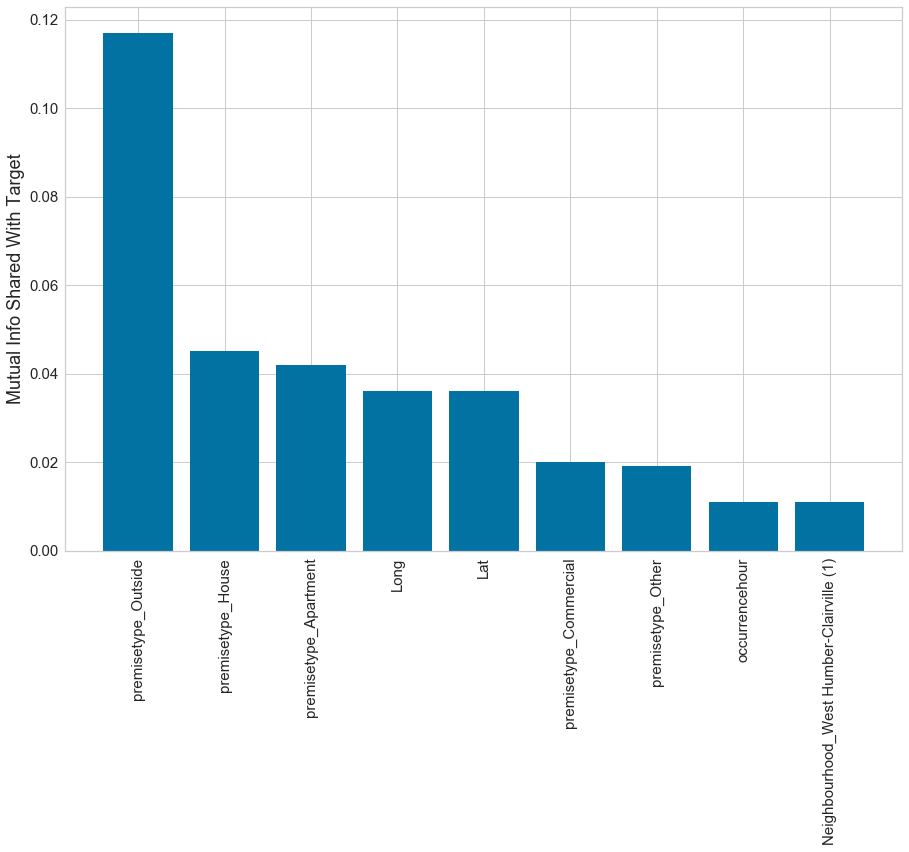

In [30]:
#plots the mutual info score and features so we can find important features
plt.figure(figsize=(15,10))
plt.bar(mutual_info_sorted['feature'].values, mutual_info_sorted['mutual_info_scores'].values)
plt.ylabel('Mutual Info Shared With Target',fontsize = 18)
plt.xticks(rotation=90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot()

#Old code for mutual info score --> not sorted
#plots the mutual info score and features so we can find important features
plt.figure(figsize=(15,15))
plt.bar(X_train.columns[:9], mutual_info_sorted[:9])
plt.ylabel('Mutual info shared with Target')
plt.xticks(rotation=90)
plt.plot()

# Decision Tree --> Don't know how to use pipelines for multiclass

In [44]:
from sklearn.tree import DecisionTreeClassifier

#clf_dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
#                             min_samples_split=8, min_samples_leaf=8, max_depth=49, max_leaf_nodes=20)


clf_dt = DecisionTreeClassifier(random_state=42)


clf_dt.fit(X_train, y_train)
#clf_dt.fit(X_train_res, y_train_res)

y_pred_dt = clf_dt.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [45]:
feature_names = X.columns
class_names_dt = [str(x) for x in clf_dt.classes_]

In [46]:
clf_dt.predict_proba(X_test);
clf_dt.predict(X_test);

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names_dt))

                 precision    recall  f1-score   support

        Assault       0.69      0.70      0.69     33183
     Auto Theft       0.43      0.42      0.42      6999
Break and Enter       0.52      0.49      0.50     12964
        Robbery       0.39      0.41      0.40      6450
     Theft Over       0.09      0.09      0.09      2001

       accuracy                           0.57     61597
      macro avg       0.42      0.42      0.42     61597
   weighted avg       0.57      0.57      0.57     61597



# One Vs. All